In [33]:
# Import required dependencies
%matplotlib inline
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Import Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Import Twitter Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Twitter API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [34]:
#search terms for news orgs by twitter handle
# BBC, CBS, CNN, Fox, NPR and New York times
target_news = ("@FoxNews", "@CBSNews", "@CNN","@NYTimes", "@NPR")

In [35]:
#List to hold news results
news_tweets = []
tweet_times = []
sentiments = []

#For Loop
for target in target_news:
    counter = 0
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    # Nested For Loop to target 100 tweets per org
    public_tweets = api.user_timeline(target, count = 100)

        # Loop through all tweets
    for tweet in public_tweets:
                # Vader Analysis
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            sentiments.append({"Date": tweet["created_at"],
                               "User": target,
                               "Compound": compound,
                               "Positive": pos,
                               "Neutral": neu,
                               "Negative": neg,
                               "Tweets Ago": counter})
            counter = counter + 1
    
    # Append sentiment to results
news_tweets.append(sentiments)

In [46]:
news_data = pd.DataFrame.from_dict(sentiments)
news_data.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
0,-0.2263,Thu Oct 04 20:24:53 +0000 2018,0.174,0.826,0.0,0,@FoxNews
1,0.0000,Thu Oct 04 20:19:03 +0000 2018,0.000,1.000,0.0,1,@FoxNews
2,0.0000,Thu Oct 04 20:03:09 +0000 2018,0.000,1.000,0.0,2,@FoxNews
3,0.0000,Thu Oct 04 19:30:41 +0000 2018,0.000,1.000,0.0,3,@FoxNews
4,-0.6369,Thu Oct 04 19:24:00 +0000 2018,0.271,0.729,0.0,4,@FoxNews


In [40]:
fox_df = news_data[news_data["User"] == "@FoxNews"]
cnn_df = news_data[news_data["User"] == "@CNN"]
nytimes_df = news_data[news_data["User"] == "@NYTimes"]
npr_df = news_data[news_data["User"] == "@NPR"]
cbsnews_df = news_data[news_data["User"] == "@CBSNews"]

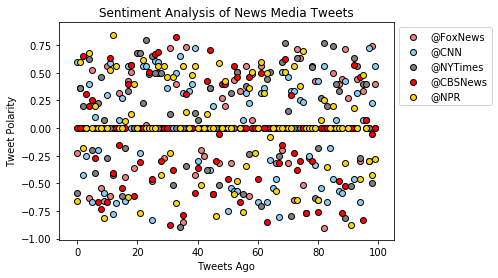

In [41]:
fox = plt.scatter(fox_df["Tweets Ago"], fox_df["Compound"],
                  color = "lightcoral", edgecolors="black", label="@FoxNews")
cnn = plt.scatter(cnn_df["Tweets Ago"], cnn_df["Compound"], 
                  color = "lightskyblue", edgecolors="black", label="@CNN")
nytimes = plt.scatter(nytimes_df["Tweets Ago"], nytimes_df["Compound"], 
                  color = "gray", edgecolors="black", label="@NYTimes")
cbs = plt.scatter(cbsnews_df["Tweets Ago"], cbsnews_df["Compound"], 
                  color = "red", edgecolors="black", label="@CBSNews")
npr = plt.scatter(npr_df["Tweets Ago"], npr_df["Compound"], 
                  color = "gold", edgecolors="black", label="@NPR")
plt.legend(handles = [fox, cnn, nytimes, cbs, npr], bbox_to_anchor = (1,1))
plt.title("Sentiment Analysis of News Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.savefig("Sentiment Analysis of News Media Tweets")
plt.show()

In [42]:
overall_sentiment = news_data.groupby("User")["Compound"].mean()
overall_sentiment

User
@CBSNews   -0.056887
@CNN        0.004359
@FoxNews    0.027386
@NPR        0.021190
@NYTimes    0.054769
Name: Compound, dtype: float64

<BarContainer object of 5 artists>

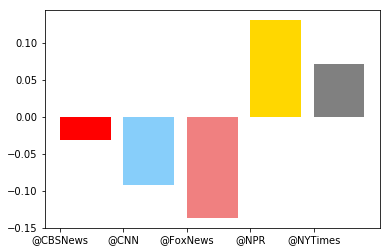

In [32]:
x_axis = np.arange(len(overall_sentiment))
xlabels = overall_sentiment.index
tick_locations = [value-10 for value in x_axis]
plt.bar(x_axis, overall_sentiment, tick_label=xlabels, color=['red', 'lightskyblue', 'lightcoral', 'gold', 'gray'], align="edge")
plt.title("Overall Sentiment of News Media Tweets")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of News Media Tweets")
plt.show()